## Step 1. 문장의 유사도를 구하는 방법

- 두 문서의 유사성은 어떻게 측정할 수 있을까?  

문장의 길이? 아니면 주어, 동사, 목적어 등의 문법 구조?  
그것보다는 얼마나 공통 '단어'를 많이 포함하고 있는가?가 더 합리적으로 보인다.
실제로 수많은 전통적인 텍스트마이닝 방법론들은 이러한 단어 기반 유사도 측정 방식을 따르며, 
현재 딥러닝, AI 시대에도 역시 문장 구조와 속성을 분석할 때 단어는 핵심 요소다.

이렇게 단어를 기준으로 문장 유사도를 구하기 위해서는 단어를 숫자로 변환해줄 필요가 있다.  
즉, 유사도 혹은 거리를 수학적으로 계산하기 위해 문장을 일종의 좌표평면 상에 놓을 수 있어야 하고  
문장이 좌표평면에 놓이기 위해서는 문장을 구성하고 있는 단어들을 스칼라 혹은 벡터값으로 변환해줘야 하는 것이다.  

따라서 문장의 유사도를 계산하는 과정은 다음과 같다.

1. 단어를 숫자(스칼라 혹은 벡터)로 변환
2. 각 문장을 벡터(단어)의 배열로 변환
3. 문장 벡터간 유사도 계산

먼저 '1. 단어를 숫자(스칼라 혹은 벡터)로 변환'하는 작업을 해보자. 

## Step 2. 빈도 기반 유사도 계산

### 2-1. 문장별 단어 카운트

단어를 숫자로 변환하려면 어떻게 해야 할까?  
가장 쉬운 방법은 각 문장에 단어가 몇번 등장하는지 세는 것이다.  
먼저 사용할 패키지를 불러온다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

샘플 문장은 다음과 같다.

- doc_1, doc_2, doc_3은 모두 cake라는 단어를 포함한다.
- doc_1과 doc_2는 먹는 케이크에 관한 내용이다.
- doc_3은 케이크라는 영화에 관한 내용이다.


In [2]:
doc_1 = "What a tasty cake!"
doc_2 = "It's a cake! chocolate cake!"
doc_3 = "The Cake Movie."

단어 수를 세기 위해 sklearn의 CounterVectorizer를 활용한다. 

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

CounterVectorizer에 인자로 stop_words를 줄 수 있다.  
stop_words는 제외할 단어들을 설정하는 것이며 'english'를 지정해주면 영어 문장에서 빈번하게 등장하는 This, That, What, a, is 등의 단어들을 제거해준다.  

이것의 효용은 문장의 특성을 강화시켜주는 데에 있다.  
CounterVectorizer를 사용해 얻은 단어 메트릭스는 일종의 단어사전인데, 우리의 단어사전이 어떤 문장에서나 보이는 단어들도 모두 포함하게 되면 사전의 크기는 매우 커지고 주요 단어들의 정보량이 희석된다.  
따라서 공통적으로 어떤 문장에서나 보이는 단어들보다는 특정 문장의 특성을 잘 보여주는 단어들을 중심으로 사전을 구성하려는 것이다.

In [4]:
vectorizer = CountVectorizer(stop_words='english')
docs = [doc_1, doc_2, doc_3]
matrix = vectorizer.fit_transform(docs)

In [5]:
matrix.todense()

matrix([[1, 0, 0, 1],
        [2, 1, 0, 0],
        [1, 0, 1, 0]])

단어사전이 가지게 된 단어는 총 4개다.

In [6]:
vectorizer.get_feature_names()

['cake', 'chocolate', 'movie', 'tasty']

doc_1, doc_2, doc_3 각각 포함하는 단어 빈도를 표시해주면 다음과 같다. 

In [7]:
df_words = pd.DataFrame(
    data=matrix.todense(), 
    index=['doc_1','doc_2','doc_3'],
    columns=vectorizer.get_feature_names())

df_words

,cake,chocolate,movie,tasty
doc_1,1,0,0,1
doc_2,2,1,0,0
doc_3,1,0,1,0


### 2-2. 문장 벡터 시각화

단어 빈도로 구성된 doc_1, doc_2, doc_3는 이제 각각 하나의 벡터로 생각해보자.  
그렇다면 해당 벡터는 4차원 공간에 표시할 수 있고, 4차원 좌표평면을 그리기는 어렵기 때문에 cake, movie, tasty 3개 단어를 x, y, z축으로 해서 문장 벡터를 시각화해보도록 하자.

그 전에, 각 문장 내용을 인덱싱해서 쉽게 볼 수 있도록 Dictionary를 하나 만들어주자.

In [8]:
doc_dict = {
    'doc_1':doc_1,
    'doc_2':doc_2,
    'doc_3':doc_3,
}

In [9]:
print('doc_1: ',doc_dict['doc_1'])
print('doc_2: ',doc_dict['doc_2'])
print('doc_3: ',doc_dict['doc_3'])

doc_1:  What a tasty cake!
doc_2:  It's a cake! chocolate cake!
doc_3:  The Cake Movie.


이렇게 각 문장을 3차원 좌표평면상에 위치시켜보자.

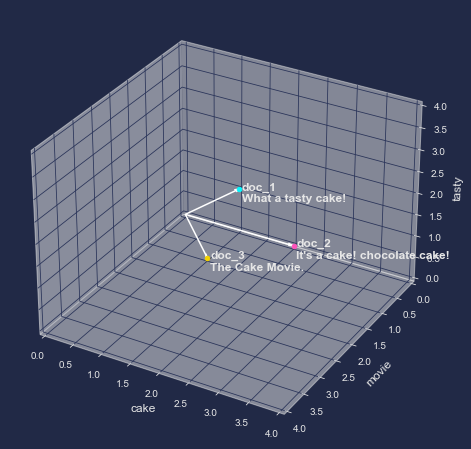

In [10]:
x_label = 'cake'
y_label = 'movie'
z_label = 'tasty'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for i, df_word in df_words.iterrows():
    x = df_word[x_label]
    y = df_word[y_label]
    z = df_word[z_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,x,y,z,
              arrow_length_ratio=0.1/vec_len)
    ax.text((x+0.05),y,(z-0.3), 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    ax.scatter(x,y,z)
              
        
ax.set_xlim(0,4)
ax.set_ylim(4,0)
ax.set_zlim(0,4)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

plt.show()

### 2-3. 문장 벡터간 유사도 계산

벡터간 유사도를 계산하기 위한 방법으로는 주로 점 간의 직경 거리를 계산하는 '유클리디안 거리', 각 벡터간 코사인 각도를 비교하는 '코사인 유사도'가 대표적이다. 참고로 벡터변환을 하지 않고 문장 내 공통 단어의 비율(동시출현빈도)을 보는 '자카드 유사도'도 가벼운 추천시스템 등에 자주 쓰이나 여기서는 다루지 않겠다.


- 유클리디안 거리는 numpy에서 제공하는 선형대수를 위한 함수 linarg를 사용해 벡터 길이 즉 노름(norm)을 계산함으로써 얻을 수 있다. 

In [11]:
dst_1_2 = np.linalg.norm(df_words.loc['doc_1'] - df_words.loc['doc_2'])
dst_2_3 = np.linalg.norm(df_words.loc['doc_2'] - df_words.loc['doc_3'])

print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"distance(doc_1~doc_2): {round(dst_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"distance(doc_2~doc_3): {round(dst_2_3,2)}")

doc_1 : What a tasty cake!
doc_2 : It's a cake! chocolate cake!
distance(doc_1~doc_2): 1.73
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
distance(doc_2~doc_3): 1.73


- 다음으로 코사인 유사도는 두 벡터의 스칼라곱을 각 벡터 길이의 곱으로 나눠줌으로써 계산할 수 있다.
- np.dot(vector_1, vector_2)를 통해 스칼라곱을 구하고, np.linalg.norm(vector_1) * np.linalg.norm(vector_2)를 통해 각 벡터 길이의 곱을 구한다.
- 마지막으로 주의할 점은 유클리디언 거리와 동일하게 '벡터간 차이'를 기준으로 잡기 위하여 '1-유사도'를 계산여 '얼마나 유사하지 않은가'를 확인하도록 하겠다. 이를 편의상 이하 '코사인 거리'로 명명하도록 하자.

In [12]:
def get_cos_dst(a, b):
    dst = np.dot(a, b)
    dst /= (np.linalg.norm(a)*np.linalg.norm(b))
    dst = 1-dst
    return dst

cos_dst_1_2 = get_cos_dst(df_words.loc['doc_1'], 
                          df_words.loc['doc_2'])
cos_dst_2_3 = get_cos_dst(df_words.loc['doc_2'], 
                          df_words.loc['doc_3'])



print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"euclidean distance: {round(dst_1_2,2)}")
print(f"cosine distance: {round(cos_dst_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"euclidean distance: {round(dst_2_3,2)}")
print(f"cosine distance: {round(cos_dst_2_3,2)}")

doc_1 : What a tasty cake!
doc_2 : It's a cake! chocolate cake!
euclidean distance: 1.73
cosine distance: 0.37
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
euclidean distance: 1.73
cosine distance: 0.37


doc_1과 doc_2, 그리고 doc_2와 doc_3은 유클리디안 거리가 서로 1.73으로 동일하며 코사인 거리 역시 0.37로 동일하다.

다시 말해 doc_1과 doc_2은 케이크에 대해 이야기하고 있고, doc_3은 영화에 대한 문장인데도 불구하고 doc_2이 doc_1, doc_3과의 유사도가 같다는 것이다. 뭔가 문제가 있어 보인다. 

이 문제를 조금 더 극대화해보자.

## Step 3. 코사인 유사도의 효용

그럼, 거리 기반 유사도(유클리디안)와 각도 기반 유사도(코사인) 방식은 계산 효용에 차이가 없는가?  
그렇지 않다. 만약 문장의 길이가 길어져 단어 빈도가 늘어난다면 유클리디안 방식은 문장의 유사도를 계산하는 데에 있어서 효용을 급격히 잃게 된다.

### 3-1. 단어가 반복 등장하는 예

예로, doc_1을 5번 반복해보자.

In [13]:
doc_1_extend = ' '.join([doc_1]*5)
doc_1_extend

'What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake!'

그리고 앞에서 한 것과 동일하게 각 문장별 단어 빈도 테이블을 생성해주자.

In [14]:
docs_with_extend = [doc_1_extend, doc_2, doc_3]
matrix_with_extend = vectorizer.fit_transform(docs_with_extend, matrix)

df_words_with_extend = pd.DataFrame(
    data=matrix_with_extend.todense(), 
    index=['doc_1_extend','doc_2','doc_3'],
    columns=vectorizer.get_feature_names())

df_words_with_extend

,cake,chocolate,movie,tasty
doc_1_extend,5,0,0,5
doc_2,2,1,0,0
doc_3,1,0,1,0


각 문장은 다음과 같다. doc_1이 다소 극단적인 예시처럼 보이지만 노래가사, 시, 광고문구 등을 떠올려보면 현실에서 문서 내에 특정 단어나 문장이 반복되는 경우는 매우 흔하다.

In [15]:
doc_dict_with_extend = {
    'doc_1_extend':doc_1_extend,
    'doc_2':doc_2,
    'doc_3':doc_3,
}
print('doc_1: ',doc_dict_with_extend['doc_1_extend'])
print('doc_2: ',doc_dict_with_extend['doc_2'])
print('doc_3: ',doc_dict_with_extend['doc_3'])

doc_1:  What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake!
doc_2:  It's a cake! chocolate cake!
doc_3:  The Cake Movie.


### 3-2. 문장 벡터 시각화

doc_1은 단어를 반복시켰고, doc_2와 doc_3은 그대로다. 좌표평면상에 3개의 문장을 표시해보자.

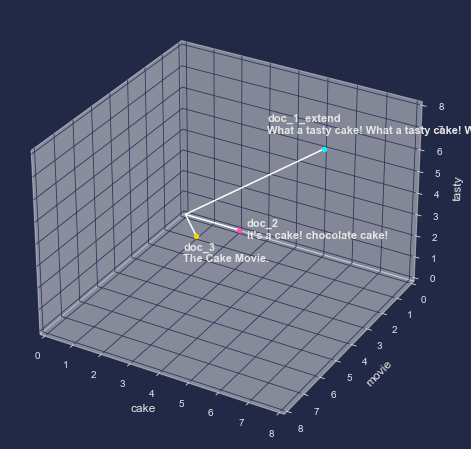

In [16]:
x_label = 'cake'
y_label = 'movie'
z_label = 'tasty'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for i, df_word in df_words_with_extend.iterrows():
    x = df_word[x_label]
    y = df_word[y_label]
    z = df_word[z_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,x,y,z,
              arrow_length_ratio=0.1/vec_len)
    
    if i=='doc_1_extend':
        text_loc = ((x-2), y, (z))
    if i=='doc_2':
        text_loc = ((x+0.3), y, (z-0.3))
    if i=='doc_3':
        text_loc = ((x-0.5), y, (z-1.5))
    ax.text(*text_loc, 
            s=f'{i}\n{doc_dict_with_extend[i]}',
            size=11,
            fontweight='bold')
    ax.scatter(x,y,z)
              
        
ax.set_xlim(0,8)
ax.set_ylim(8,0)
ax.set_zlim(0,8)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

plt.show()

- doc_1의 벡터 길이는 5배 길어졌다. 
- doc_1과 doc_2, 그리고 doc_2와 doc_3의 각도는 서로 동일하다.
- doc_1과 doc_2의 직경 거리가 doc_2와 doc_3의 직경 거리보다 길어졌다.

### 3-3. 문장 벡터간 유사도 계산

이제 유클리디안 거리, 코사인 거리를 수치로 확인해보자.

In [17]:
dst_1_2_with_extend = np.linalg.norm(df_words_with_extend.loc['doc_1_extend'] - df_words_with_extend.loc['doc_2'])
dst_2_3_with_extend = np.linalg.norm(df_words_with_extend.loc['doc_2'] - df_words_with_extend.loc['doc_3'])

cos_dst_1_2_with_extend = get_cos_dst(df_words_with_extend.loc['doc_1_extend'], 
                          df_words_with_extend.loc['doc_2'])
cos_dst_2_3_with_extend = get_cos_dst(df_words_with_extend.loc['doc_2'], 
                          df_words_with_extend.loc['doc_3'])



print('='*20)
print(f"doc_1 : {doc_dict_with_extend['doc_1_extend']}")
print(f"doc_2 : {doc_dict_with_extend['doc_2']}")
print(f"euclidean distance: {round(dst_1_2_with_extend,2)}")
print(f"cosine distance: {round(cos_dst_1_2_with_extend,2)}")

print('='*20)
print(f"doc_2 : {doc_dict_with_extend['doc_2']}")
print(f"doc_3 : {doc_dict_with_extend['doc_3']}")
print(f"euclidean distance: {round(dst_2_3_with_extend,2)}")
print(f"cosine distance: {round(cos_dst_2_3_with_extend,2)}")

doc_1 : What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake! What a tasty cake!
doc_2 : It's a cake! chocolate cake!
euclidean distance: 5.92
cosine distance: 0.37
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
euclidean distance: 1.73
cosine distance: 0.37


- doc_1과 doc_2의 유클리디안 거리는 5.92, 코사인 거리는 0.37이다.
- doc_2와 doc_3의 유클리디안 거리는 1.73, 코사인 거리는 0.37이다.

doc_1과 doc_2는 먹는 케이크에 대한 내용, doc_3은 영화 제목에 대한 내용임에도 doc_1의 문장이 길어짐으로써(정확히는 단어가 반복되면서) doc_2와의 직경 거리가 더 멀어졌다. 반대로 벡터의 길이가 아무리 길어졌어도 doc_1과 doc_2, 그리고 doc_2와 doc_3의 코사인 거리는 동일하게 보존되고 있다. 

이를 통해 유클리디안 거리는 문장 크기에 강한 영향을 받으며 코사인 거리는 문장 크기로부터 자유롭다는 것을 확인했다.

## Step 4. 선형 변환을 통한 의미상 유사도 계산

다시 문장의 길이를 늘리기 전 상황으로 돌아가보자.  

doc_1과 doc_2의 토픽은 케이크, doc_2의 토픽은 영화다. 그렇다면 doc_1과 doc_2의 유사도는 doc_2와 doc_2의 유사도보다 높아야 한다. 즉, 거리가 더 짧아야 한다. 그러나 doc_1과 doc_2, 그리고 doc_2와 doc_3의 거리는 동일하다.(유클리디안, 코사인 방식 모두.)

그렇다면 의미가 유사한 doc_1과 doc_2는 더 가깝게, doc_3은 조금 더 멀리 떨어뜨릴 순 없을까?  

방법은 좌표계를 바꾸는 것이다. 잠깐 생각해보면, 우리는 좌표평면의 축에 대해서 고려하지 않았다. 좌표평면 축은 각각 'movie', 'cake', 'tasty'의 빈도 수를 나타내며 이에 대해 암묵적으로 좌표계상 기저를 (0,0,1), (0,1,0), (1,0,0)으로 고정시킨 것이다.  

이 기저를 선형변환해서 좌표계를 찌그러뜨린다면 doc_1, doc_2, doc_3의 벡터도 기저에 따라 선형변환하며 doc_1과 doc_2는 가깝게, doc_3은 멀게 위치시킬 수 있다.



### 4-1. 단어에 의미를 부여하는 워드임베딩

선형변환을 하기 위해서는 기저벡터를 먼저 구해야 한다. 즉, 문장이 위치할 좌표평면상 축을 구성하는 'movie', 'cake', 'tasty'가 각각 어디에 위치하는지, 축의 위치를 잡는 것이다.

이를 위해서는 'movie', 'cake', 'tasty'에 대한 벡터 값이 있어야 하는데, 이를 구하기 위해서 단어임베딩 모델을 사용할 수 있다.
단어임베딩은 위키피디아 같은 방대한 텍스트에서 문장들을 추출하고, 각 문장 내 단어의 위치관계를 학습해 각 단어마다의 의미를 벡터로 정의하는 방식이다. 
앞서 우리가 간단히 빈도로 구성한 단어사전이 각 단어마다 정수 형태의 scalar 값을 가졌다면, 단어임베딩의 결과물인 밀집 단어사전은 각 단어가 수백차원의 밀집벡터(정수가 아닌 -1 에서 1 사이로 압축된 실수 형태)라고 생각하면 된다. 

이미 수많은 언어모델이 공개되어있고 언어모델은 반드시 텍스트를 벡터로 변환하는 토크나이저를 포함하므로 이러한 토크나이저의 근간이 되는 학습된 단어임베딩 모델을 쉽게 가져다 사용할 수 있다. 참고로 단어임베딩 모델은 각 테스크에 특화되어 있는 것이 일반적이다. 예를 들어 위키피디아를 학습한 단어임베딩 모델이 가지고 있는 단어사전은 뉴스를 학습한 단어임베딩 모델이 가지고 있는 단어사전과 다르다. 

In [18]:
from gensim import downloader, corpora, utils

전통적으로 word2vec 모델이 많이 쓰이는데, word2vec 모델은 쪼갤 수 있는 최소 단위를 말그대로 '단어'로 한다. 반면 페이스북에서 이를 더 작은 글자(text) 단위로 학습할 수 있도록 개량한 모델이 fasttext다. fasttext의 강점은 학습 모델이 'truelove' 같은 단어를 본적이 없다하더라도 'true', 'love'를 각각 경험했다면 'truelove'를 'love'와 가까운 단어로 인식하고 계산할 수 있다는 것이다. 

본 실습에서도 fasttext를 사용하며, 영문 단어임베딩에 대표적으로 많이 쓰이는 'fasttext-wiki-news-subwords-300' 모델을 빌려와 사용하도록 하겠다. 

In [19]:
fasttext = downloader.load('fasttext-wiki-news-subwords-300')
fasttext

지금부터 fasttext를 단어사전이라 생각하자. movie를 사전에서 검색해보면 다음과 같은 결과가 나온다.

In [20]:
fasttext.word_vec('movie')

array([-0.063386  , -0.074039  , -0.01791   ,  0.11879   ,  0.020304  ,
       -0.025058  ,  0.022974  , -0.12892   ,  0.070839  ,  0.070985  ,
        0.051102  , -0.06328   ,  0.11964   , -0.059135  , -0.16655   ,
       -0.017505  ,  0.13078   , -0.024237  ,  0.037903  , -0.029335  ,
        0.020504  , -0.084799  , -0.014779  ,  0.082775  ,  0.021256  ,
       -0.0039036 ,  0.038177  ,  0.027162  ,  0.042865  ,  0.098359  ,
       -0.093031  , -0.0066163 ,  0.01608   , -0.086323  ,  0.062969  ,
       -0.0037037 , -0.014836  , -0.011857  ,  0.035124  , -0.031741  ,
       -0.031867  , -0.097423  ,  0.0010919 , -0.061288  ,  0.01757   ,
        0.060311  ,  0.092537  , -0.061333  , -0.013193  ,  0.012152  ,
        0.057742  ,  0.029646  ,  0.033386  ,  0.022229  , -0.060602  ,
       -0.020832  ,  0.0277    , -0.098722  , -0.10058   , -0.029631  ,
        0.018319  , -0.0084914 ,  0.1391    ,  0.0068764 ,  0.084484  ,
        0.0073442 ,  0.050864  , -0.0034739 , -0.037454  ,  0.09

단어사전에서 꺼낸 movie는 300차원짜리 벡터다.  
이는 앞에서 우리가 movie에 어떠한 의미도 주지 않고 (0,1,0)의 3차원 기저벡터로 설정했던 것과 비교된다.

In [21]:
fasttext.word_vec('movie').shape

(300,)

movie와 비슷한 단어 10개를 다음과 같이 사전에서 검색할 수 있다. 

In [22]:
fasttext.most_similar('movie', topn=10)

[('film', 0.8769422769546509),
 ('movie-', 0.8271825313568115),
 ('movies', 0.7997194528579712),
 ('film--', 0.7811052799224854),
 ('movie.', 0.7665870189666748),
 ('film.', 0.7414735555648804),
 ('filmdom', 0.7352851629257202),
 ('mini-movie', 0.729194164276123),
 ('films', 0.7288245558738708),
 ('moviehouse', 0.728100061416626)]

movie와 가장 비슷한 flim과의 유사도를 보면 0.876~이다. 이는 코사인 유사도인데, 앞에서 우리가 만든 코사인 거리 함수로 같은 값을 도출할 수 있다.  
코사인 거리 함수의 출력값은 '1-유사도' 이므로 아래 결과값에서 1-dst를 해주면 0.876~이 나온다는 것을 이해할 수 있다.

In [23]:
dst = get_cos_dst(fasttext.word_vec('movie'), fasttext.word_vec('film'))
dst

0.1230577826499939

물론 fasttext를 사용해 거리도 계산할 수 있다. 마찬가지로 결과값은 1-유사도다.  

In [24]:
print('fasttext.distance(): ', round(fasttext.distance('movie', 'film'), 5))

fasttext.distance():  0.12306


이제 우리 좌표평면상 기저벡터인 cake, tasty, movie의 서로간 거리를 살펴보자.  
기존에 임의로 설정한 기저를 기준으로 하면 거리는 모두 동일해야 하지만 현재 임베딩된 값으로 비교했을 때는 차이가 있다.

In [25]:
dst = get_cos_dst(fasttext.word_vec('movie'), fasttext.word_vec('cake'))
print('distance(movie ~ cake): ', round(dst, 5))

distance(movie ~ cake):  0.69092


In [26]:
dst = get_cos_dst(fasttext.word_vec('movie'), fasttext.word_vec('tasty'))
print('distance(movie ~ tasty): ', round(dst, 5))

distance(movie ~ tasty):  0.67821


In [27]:
dst = get_cos_dst(fasttext.word_vec('cake'), fasttext.word_vec('tasty'))
print('distance(cake ~ tasty): ', round(dst, 5))

distance(cake ~ tasty):  0.50505


cake와 tasty의 코사인 거리는 0.5인 반면 movie와 cake, movie와 tasty는 각각 0.69, 0.67로 의미상 거리가 더 멀다는 것을 확인할 수 있다.  

그런데 아쉽게도 우리는 300차원짜리 단어 벡터로는 좌표계를 그릴 수 없다. 적어도 3차원으로는 바꿔줘야 한다.

### 4-2. PCA(차원축소)

다행히 우리는 비지도학습 기반 차원축소 기법을 사용할 수 있다. 차원축소는 다차원 데이터를 더 작은 데이터로 압축하는 방법이며, 데이터가 가지고 있는 본연의 특성을 최대한 유지하면서 변수를 줄일 수 있다. 물론, 300차원을 3차원으로 축소하게 되면 그만큼 정보손실이 발생한다. 그러나 우리는 머신러닝 모델링이 아니라 단순히 3차원 좌표계로 문서간 거리를 확인하고자 함이므로 정보손실을 감수하고 차원을 줄이도록 하겠다. 

차원 축소를 위해서 'movie', 'cake', 'tasty' 3가지 값을 포함해 관련 단어들을 각 단어당 200개씩 추출해서 데이터를 구성하겠다. 이렇게 하는 이유는 'movie', 'cake', 'tasty' 각 단어의 유사 군집을 함께 비지도학습 시킴으로써 상대적으로 3개 단어의 위치정보를 인지시키기 위함이다. 이렇게 했을 때 큰 정보손실에도 고유의 군집 특성을 남길 수 있다.

- 먼저, 연관 단어를 추출한다.

In [28]:
target_words = ['movie','cake','tasty']
sim_words_1 = [x[0] for x in fasttext.most_similar(target_words[0], topn=200)]
sim_words_2 = [x[0] for x in fasttext.most_similar(target_words[1], topn=200)]
sim_words_3 = [x[0] for x in fasttext.most_similar(target_words[2], topn=200)]


all_words = target_words + sim_words_1 + sim_words_2 + sim_words_3

In [29]:
#sample
all_words[-10:]

['sweet-',
 'hoppy',
 'winy',
 'punchy',
 'eye-poppingly',
 'no-bake',
 'inedible',
 'interesting-sounding',
 'zesty',
 'home-baked']

- 모든 단어에 대한 300차원의 벡터 값을 가져온다.

In [30]:
word_vecs_300d = np.array([fasttext.word_vec(x) for x in all_words])

- 그러면 메트릭스는 603개 단어에 대한 300차원 벡터로 구성된다.

In [31]:
word_vecs_300d.shape

(603, 300)

- PCA 모델은 sklearn 패키지에서 제공한다. 
- n_components 파라미터를 통해 축소할 차원을 3차원으로 설정하고, 결과값을 데이터프레임으로 생성해준다.

In [32]:
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
comps = pca_3d.fit_transform(word_vecs_300d)
df_comps = pd.DataFrame(comps, 
                        columns=['comp_1','comp_2','comp_3'], 
                        index=all_words)
df_comps

,comp_1,comp_2,comp_3
movie,-0.494765,0.195336,0.387401
cake,0.593467,0.553232,0.220402
tasty,0.406942,-0.395994,0.359313
film,-0.589118,0.275997,0.438235
movie-,-0.373883,0.040159,0.098605
...,...,...,...
no-bake,0.138898,-0.038788,-0.044909
inedible,0.174704,-0.191897,-0.053952
interesting-sounding,-0.095999,-0.145336,-0.216632
zesty,0.180599,-0.317790,0.225629


압축된 차원의 데이터분포상 범위는 다음과 같다.

In [33]:
df_comps.max()

comp_1    0.611587
comp_2    0.553232
comp_3    0.482012
dtype: float32

In [34]:
df_comps.min()

comp_1   -0.589118
comp_2   -0.511691
comp_3   -0.216632
dtype: float32

### 4-3. 기저 벡터 및 문장 벡터 시각화

- 이제 기저 벡터에 대한 3차원 값을 확인할 수 있다.  
- 기저 벡터를 선으로 그리고, 기존 문장 벡터는 기저 벡터에 따라 선형 변환시킨 다음 좌표계에 찍어보도록 하자.

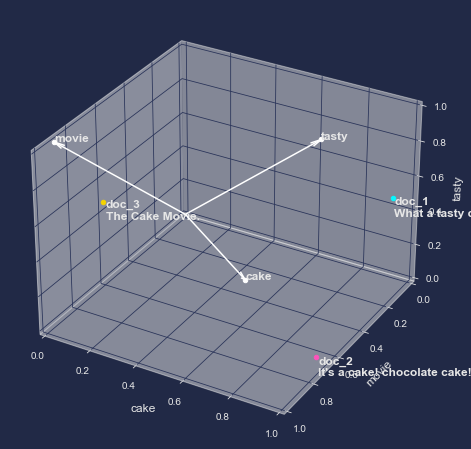

In [35]:
comp_1_label = 'comp_1'
comp_2_label = 'comp_2'
comp_3_label = 'comp_3'


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

target_words = ['movie','cake','tasty']
df_targets = df_comps.loc[target_words]
for word, word_vec in df_targets.iterrows():
    comp_1 = word_vec[comp_1_label]
    comp_2 = word_vec[comp_2_label]
    comp_3 = word_vec[comp_3_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,comp_1,comp_2,comp_3,
              arrow_length_ratio=0.1/vec_len)
    ax.text(comp_1,comp_2,comp_3, 
            s=word,
            size=12,
            fontweight='bold',
            )
    ax.scatter(comp_1,comp_2,comp_3, c='white')

docs_origin_pos = df_words[target_words]
for i, doc_pos in docs_origin_pos.iterrows():
    
    # 선형 변환
    x, y, z = doc_pos.dot(df_targets)
    
    ax.text((x+0.01),y,(z-0.1), 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    
    ax.scatter(x,y,z)
    

ax.set_xlim(0,1)
ax.set_ylim(1,0)
ax.set_zlim(0,1)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)


plt.show()

기저 벡터가 기존에 (1,0,0), (0,1,0), (0,0,1)이었다면 지금은 (-0.49, 0.19, 0.38), (0.59, 0.55, 0.22), (0.40, -0.39, 0.35)로 선형 변환되었다.  

In [36]:
df_targets

,comp_1,comp_2,comp_3
movie,-0.494765,0.195336,0.387401
cake,0.593467,0.553232,0.220402
tasty,0.406942,-0.395994,0.359313


선형 변환된 기저 벡터에 따라 문서 벡터 역시 선형 변환시켰다. 선형 변환은 다음과 같이 행렬곱을 통해 수행할 수 있다.

In [43]:
df_words[['movie','cake','tasty']].dot(df_targets)

,comp_1,comp_2,comp_3
doc_1,1.000410,0.157238,0.579715
doc_2,1.186934,1.106464,0.440803
doc_3,0.098702,0.748568,0.607803


마지막으로, 기저 벡터의 방향에 따라 3차원 좌표계 축을 다시 그리고 좌표계상 문서 벡터의 끝점 위치를 찍어보자.

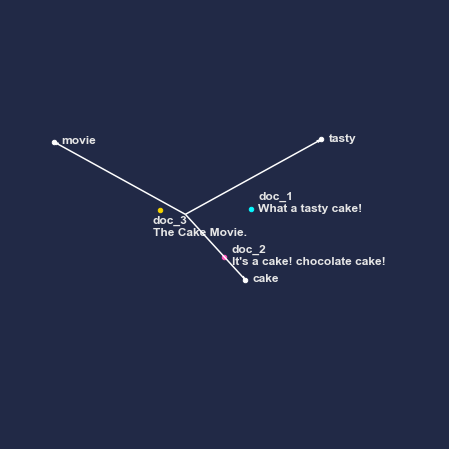

In [44]:
comp_1_label = 'comp_1'
comp_2_label = 'comp_2'
comp_3_label = 'comp_3'


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

target_words = ['movie','cake','tasty']
df_targets = df_comps.loc[target_words]
for word, word_vec in df_targets.iterrows():
    comp_1 = word_vec[comp_1_label]*3
    comp_2 = word_vec[comp_2_label]*3
    comp_3 = word_vec[comp_3_label]*3
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,comp_1,comp_2,comp_3,
              arrow_length_ratio=0.03/vec_len,)
    ax.text((comp_1+0.1),comp_2,comp_3, 
            s=word,
            size=12,
            fontweight='bold',
            )
    ax.scatter(comp_1,comp_2,comp_3, c='white')

docs_origin_pos = df_words[target_words]
for i, doc_pos in docs_origin_pos.iterrows():
    
    # 선형 변환
    x, y, z = doc_pos.dot(df_targets)
    if i=='doc_1':
            text_loc = ((x+0.1), y, (z))
    if i=='doc_2':
        text_loc = ((x+0.1), y, (z-0.1))
    if i=='doc_3':
        text_loc = ((x-0.1), y, (z-0.5))
    ax.text(*text_loc, 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    
    ax.scatter(x,y,z)
    

ax.set_xlim(0,3)
ax.set_ylim(3,0)
ax.set_zlim(0,3)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

ax.axis('off')

plt.show()

축의 각도와 각 문서 벡터 끝점(doc_1, doc_2, doc_3)의 위치가 바뀐 것을 더 명확히 확인할 수 있다.

### 4-4. 문장 벡터간 유사도 계산

시각화 했던 코드에서 다음과 같이 변수를 만들어 주었다. 위에서도 확인한 값이지만, df_doc_trans_pos는 선형 변환된 문장 벡터의 끝점 위치를 보여준다.  
이제 선형 변환시킨 문장 벡터의 코사인 거리가 어떻게 바뀌었을지 확인해보자.

In [45]:
df_doc_trans_pos = docs_origin_pos.dot(df_targets)
df_doc_trans_pos

,comp_1,comp_2,comp_3
doc_1,1.000410,0.157238,0.579715
doc_2,1.186934,1.106464,0.440803
doc_3,0.098702,0.748568,0.607803


In [46]:
dst_trans_1_2 = np.linalg.norm(df_doc_trans_pos.loc['doc_1'] - df_doc_trans_pos.loc['doc_2'])
dst_trans_2_3 = np.linalg.norm(df_doc_trans_pos.loc['doc_2'] - df_doc_trans_pos.loc['doc_3'])


cos_dst_trans_1_2 = get_cos_dst(df_doc_trans_pos.loc['doc_1'],
                               df_doc_trans_pos.loc['doc_2'])
cos_dst_trans_2_3 = get_cos_dst(df_doc_trans_pos.loc['doc_2'],
                               df_doc_trans_pos.loc['doc_3'])


print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"euclidean distance: {round(dst_trans_1_2,2)}")
print(f"cosine distance: {round(cos_dst_trans_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"euclidean distance: {round(dst_trans_2_3,2)}")
print(f"cosine distance: {round(cos_dst_trans_2_3,2)}")

doc_1 : What a tasty cake!
doc_2 : It's a cake! chocolate cake!
euclidean distance: 0.98
cosine distance: 0.18
doc_2 : It's a cake! chocolate cake!
doc_3 : The Cake Movie.
euclidean distance: 1.16
cosine distance: 0.26


- doc_1과 doc_2의 유클리디안 거리는 0.98, 코사인 거리는 0.18이다.
- doc_2와 doc_3의 유클리디안 거리는 1.16, 코사인 거리는 0.26이다.

다시 정리하면, doc_1과 doc_2는 먹는 케이크에 대한 내용, doc_3은 영화 제목에 대한 내용이었다. 그리고 선형 변환 전에는 doc_1과 doc_2, doc_2와 doc_3간의 유클리디언 거리 및 코사인 거리가 서로 동일했다.

그러나 기저 벡터의 선형 변환에 따라 좌표계가 바뀐 뒤에는 doc_1과 doc_2간의 거리가 doc_2와 doc_3간의 거리보다 유클리디안, 코사인 방식 모두에서 더 짧아졌다.  

지금까지 문장의 유사도를 구하는 방법에 대해 알아보았다.  
그 과정에서 코사인 유사도의 유클리디안 거리 계산 방식 대비 효용, 그리고 단어와 문장을 벡터로 변환하는 방법들을 확인했고, 더 나아가 기저 벡터의 선형 변환 및 좌표계 수정을 통해 문장의 의미를 고려한 유사도 계산 방법에 대해서도 확인해보았다.